## This jupyter notebook will take all samples and create 27 MATLAB files. Each MATLAB file will correspond to one patch (section) of the brain. 

In [1]:
import numpy as np
import scipy.io as sio


input_3D = np.ones(shape=(128,128,128))

print(input_3D.shape)
print(type(input_3D))

(128, 128, 128)
<class 'numpy.ndarray'>


In [2]:
#takes images sized (128, 128, 128)
#outputs images sized (100, 81, 80)
#outputs from the center of the image
def roughChop(input_3D):
    #if (input_3D.shape != (128, 128, 128)):
    if (input_3D.shape != (128, 128, 166)):
        print("You have passed an incorrectly sized array to roughChop. Required array size: (128, 128, 166).")
        print("You passed an array of size: " + str(input_3D.shape))
    else:
        output_3D = np.copy(input_3D)
        output_3D = output_3D[14:-14,24:-23,43:-43]
        return output_3D
    
    

In [3]:
input_3D_2 = np.zeros(shape=(100,100,1))
roughChop(input_3D_2)

You have passed an incorrectly sized array to roughChop. Required array size: (128, 128, 166).
You passed an array of size: (100, 100, 1)



### The voxel intensities of each MRI and PET image are used for classification. The whole brain images are simply divided into 3 × 3 × 3 parts to extract 27 patches of size 50 × 41 × 40 voxels. Each patch has half overlaps with its neighbor in every direction.

In [4]:
#object which will yield 27 patches 

class patch_iter:
    #input requires a 3D image of size 100, 81, 80
    def __init__(self, input_3D):
        if (input_3D.shape != (100, 81, 80)):
            print("You have passed an incorrectly sized array to patch_iter. Required array size: (100, 81, 80).")
            print("You passed an array of size: " + str(input_3D.shape))
            return 
        self.i = 0
        self.n = 27
        self.input_3D = input_3D
    def __iter__(self):
        # Iterators are iterables too.
        # Adding this functions to make them so.
        return self
    def next(self):
        if self.i < self.n:
            i = self.i
            self.i += 1
            #print(i)
            #return i
            dim1_start_idxs = [0, 25, 50] #[0-49], [25-74], [50-99] inclusive
            dim1_end_idxs =[50, 75, 100]
            dim2_start_idxs = [0, 20, 40] #[0-39], [20-59], [41-80] inclusive, (slightly different overlap because 81 isn't even)
            dim2_end_idxs =[41, 61, 81]
            dim3_start_idxs = [0, 20, 40]
            dim3_end_idxs = [40, 60, 80]
            ii = int(i / 9)
            jj = int( (i %9)  / 3)
            kk = int(i % 3)
            #print("dim 1: " + str(dim1_start_idxs[ii]) + " " + str(dim1_end_idxs[ii]), end ="\t")
            #print("dim 2: " + str(dim2_start_idxs[jj]) + " " + str(dim2_end_idxs[jj]), end ="\t")
            #print("dim 3: " + str(dim3_start_idxs[kk]) + " " + str(dim3_end_idxs[kk]), end ="\t")
            
            return input_3D[dim1_start_idxs[ii]:dim1_end_idxs[ii],dim2_start_idxs[jj]:dim2_end_idxs[jj],dim3_start_idxs[kk]:dim3_end_idxs[kk]]
        else:
            raise StopIteration()


In [5]:
#y = patch_iter(output_3D)

#for ii in range(27):
#    thisPatch = y.next()
#    #print(thisPatch.shape)

In [6]:
def get_patch(input_3D, patch_idx):
    if (patch_idx < 0 | patch_idx > 26):
        print("You have passed an incorrect patch index to get patch: "+ str(patch_idx))
    dim1_start_idxs = [0, 25, 50] #[0-49], [25-74], [50-99] inclusive
    dim1_end_idxs =[50, 75, 100]
    dim2_start_idxs = [0, 20, 40] #[0-39], [20-59], [41-80] inclusive, (slightly different overlap because 81 isn't even)
    dim2_end_idxs =[41, 61, 81]
    dim3_start_idxs = [0, 20, 40]
    dim3_end_idxs = [40, 60, 80]
    ii = int(patch_idx / 9)
    jj = int( (patch_idx %9)  / 3)
    kk = int(patch_idx % 3)
    return input_3D[dim1_start_idxs[ii]:dim1_end_idxs[ii],dim2_start_idxs[jj]:dim2_end_idxs[jj],dim3_start_idxs[kk]:dim3_end_idxs[kk]]


In [7]:
#def load_data(patch_i,data_i):

#UNDER CONSTRUCTION
if 0:
    def load_data():
        #patch_i is an index for which patch in the current brain sample, so it's 0 to 26
        #data_i is an index for which brain sample, so it's 0 to num_brains, in the for loop, it is passed in as the index of the current iteration of the loop
        #data_i = data_i+1 #incrementing data_i by 1 each time, so i think that it goes from 1 to num_brains+1 entries when pulling patch data
        #dataSetpath = '/media/disk_e/PET_PatchDATA' #specified path to the location of the PET scan patch data, WE WILL NEED TO CHANGE THIS!
        #filename = 'AffineADNC64_Patch'+str(patch_i)+'_PET_'+str(data_i)+'.mat' #file has to be a .mat file, and, for them
                                                                                #it's in the format AffineADNC64_Patch(patch id)_PET_(data id).mat
        #full_filename= os.path.join(dataSetpath,filename) #creates the full conjoined path of the dataSet's path and the file's name
        full_filename = "matlab_output.mat"
        dataMat = sio.loadmat(full_filename) #loading the data(.mat) file
        AD_name = 'PatchAD' #column name for the alzheimer's detection data
        AD_data = dataMat[AD_name] #getting the alzheimer's detection patch from the data file
        num_AD =  AD_data.shape[0]
        NC_name = 'PatchNC' #column name for the normal control data
        NC_data = dataMat[NC_name]
        num_NC =  NC_data.shape[0]
        X_size,Y_size,Z_size = NC_data.shape[1:]
        del dataMat
        numAllSample = num_AD+num_NC
        adLabel =  np.ones((num_AD,))
        normalLabel =  np.zeros((num_NC,))
        imgADNC_3D = np.zeros((numAllSample,50,41,40))
        imgADNC_3D[:num_AD,:X_size,:Y_size,:Z_size] = AD_data[:,:50,:41,:40]
        imgADNC_3D[num_AD:,:X_size,:Y_size,:Z_size] = NC_data[:,:50,:41,:40]
        imgVector = imgADNC_3D.reshape(numAllSample,-1)
        imgVector = imgVector.astype('float16')
        imgVector = (imgVector-np.min(imgVector))*2.0/(float(np.max(imgVector)-np.min(imgVector)))-1
        data3dvt = imgVector
        imgLabel = np.hstack((adLabel,normalLabel))
        return data3dvt,imgLabel 

In [8]:
def save_data(array_of_3D_AD_patches, array_of_3D_NC_patches, patch_idx):
    file_name = "matlab_output_patch_" + str(patch_idx)
    mdict = {'PatchAD': array_of_3D_AD_patches, 'PatchNC': array_of_3D_NC_patches}
    sio.savemat(file_name, mdict)

In [9]:
#input_3D_AD = arrayOfPatches
#input_3D_NC = arrayOfPatches[:5] + 1

#save_data(input_3D_AD, input_3D_NC)

In [10]:
#data3dvt,imgLabel = load_data()

In [11]:
#print(data3dvt.shape)
#print(imgLabel)

#length_v = imgLabel.shape[0]        
#data3dvt_reshaped = data3dvt.reshape(length_v, 50, 41, 40)
#print(data3dvt_reshaped.shape)

# code to traverse the ADNI files

In [22]:
import os
import pydicom

## traverses the adni files

# Bryce here you go 

# <333
# Reid


In [28]:
patient_condition = 'AD' # set this to 'NC' to traverse the other folder

adni_file_path = "" + os.getcwd() + "\\..\\ADNI_" + patient_condition + "_Full\\ADNI"
print(adni_file_path)

listFilesDCM = []
folders_level1 = os.listdir(adni_file_path)
#for patch_idx in range(27):
    #for sample in folders_level1:

numSamples = len(folders_level1)
#patch_array = np.zeros(shape=(numSamples, 50, 41, 40))

for sample_idx in range(len(folders_level1)):
    sample = folders_level1[sample_idx]
    sample_file_path = os.path.join(adni_file_path, sample)
    
    # these lines are commented because Cal said he would standardize the the naming of the folders to just MPRAGE. 
    
    #if "MP-RAGE" in os.listdir(sample_file_path):
    #    sample_file_path = os.path.join(sample_file_path, "MP-RAGE")
    #elif "MPRAGE" in os.listdir(sample_file_path):
    #    sample_file_path = os.path.join(sample_file_path, "MPRAGE")
    #    continue
    #else:
    #    print("you have a bad file path in listFilesDCM. " + str(adni_file_path) + " doesn't contain MPRAGE or MP-RAGE")
    #    continue
    #print(sample_file_path)
    sample_file_path = os.path.join(sample_file_path, "MPRAGE")
    sample_file_path = os.path.join(sample_file_path, os.listdir(sample_file_path)[0])
    #print(sample_file_path)
    for ii in range(len(os.listdir(sample_file_path))):
        sample_file_path = os.path.join(sample_file_path, os.listdir(sample_file_path)[ii])
        #print(sample_file_path)
        listFilesDCM =  os.listdir(sample_file_path)

        #we read in metadata by just looking at the first DCM file in the sample
        #metaFilePath = os.path.join(sample_file_path, listFilesDCM[0])

        #potentially needs to not be hardcoded
        #ConstPixelDims_ds = (128, 128, len(listFilesDCM))

        #RefDs = pydicom.read_file(metaFilePath)
        #print("RefsDS shape: " + str(RefDs.pixel_array.shape))
        #ArrayDicom_ds is the downsampled 
        #ArrayDicom_ds = numpy.zeros(ConstPixelDims_ds, dtype=RefDs.pixel_array.dtype)

        for filenameDCM in os.listdir(sample_file_path):
            final_file_path = os.path.join(sample_file_path, filenameDCM)
            ##
            ## WORK ON EACH DCM FILE GOES HERE
            ##
            print(filenameDCM)



C:\Users\Reid\Desktop\dataSciPrinciples\finalProj\Alz-Finders\..\ADNI_AD_Full\ADNI
ADNI_003_S_1059_MR_MPRAGE_br_raw_20061110095115953_98_S22301_I29252.dcm
ADNI_003_S_1059_MR_MPRAGE_br_raw_20061110095116015_99_S22301_I29252.dcm
ADNI_003_S_1059_MR_MPRAGE_br_raw_20061110095116109_100_S22301_I29252.dcm
ADNI_003_S_1059_MR_MPRAGE_br_raw_20061110095116171_101_S22301_I29252.dcm
ADNI_003_S_1059_MR_MPRAGE_br_raw_20061110095116250_102_S22301_I29252.dcm
ADNI_003_S_1059_MR_MPRAGE_br_raw_20061110095116328_103_S22301_I29252.dcm
ADNI_003_S_1059_MR_MPRAGE_br_raw_20061110095116406_104_S22301_I29252.dcm
ADNI_003_S_1059_MR_MPRAGE_br_raw_20061110095116484_105_S22301_I29252.dcm
ADNI_003_S_1059_MR_MPRAGE_br_raw_20061110095116562_106_S22301_I29252.dcm
ADNI_003_S_1059_MR_MPRAGE_br_raw_20061110095116843_107_S22301_I29252.dcm
ADNI_003_S_1059_MR_MPRAGE_br_raw_20061110095116921_108_S22301_I29252.dcm
ADNI_003_S_1059_MR_MPRAGE_br_raw_20061110095117031_109_S22301_I29252.dcm
ADNI_003_S_1059_MR_MPRAGE_br_raw_2006111009

ADNI_011_S_0053_MR_MPRAGE_br_raw_20051114125135125_119_S10065_I8669.dcm
ADNI_011_S_0053_MR_MPRAGE_br_raw_20051114125135671_12_S10065_I8669.dcm
ADNI_011_S_0053_MR_MPRAGE_br_raw_20051114125135953_120_S10065_I8669.dcm
ADNI_011_S_0053_MR_MPRAGE_br_raw_20051114125136250_121_S10065_I8669.dcm
ADNI_011_S_0053_MR_MPRAGE_br_raw_20051114125136531_122_S10065_I8669.dcm
ADNI_011_S_0053_MR_MPRAGE_br_raw_20051114125136812_123_S10065_I8669.dcm
ADNI_011_S_0053_MR_MPRAGE_br_raw_20051114125137093_124_S10065_I8669.dcm
ADNI_011_S_0053_MR_MPRAGE_br_raw_20051114125137359_125_S10065_I8669.dcm
ADNI_011_S_0053_MR_MPRAGE_br_raw_20051114125137640_126_S10065_I8669.dcm
ADNI_011_S_0053_MR_MPRAGE_br_raw_20051114125138125_127_S10065_I8669.dcm
ADNI_011_S_0053_MR_MPRAGE_br_raw_20051114125138640_128_S10065_I8669.dcm
ADNI_011_S_0053_MR_MPRAGE_br_raw_20051114125138921_129_S10065_I8669.dcm
ADNI_011_S_0053_MR_MPRAGE_br_raw_20051114125139203_13_S10065_I8669.dcm
ADNI_011_S_0053_MR_MPRAGE_br_raw_20051114125139484_130_S10065_I866

ADNI_016_S_0991_MR_MPRAGE_br_raw_20061102095046874_44_S21736_I28391.dcm
ADNI_016_S_0991_MR_MPRAGE_br_raw_20061102095047249_45_S21736_I28391.dcm
ADNI_016_S_0991_MR_MPRAGE_br_raw_20061102095047624_46_S21736_I28391.dcm
ADNI_016_S_0991_MR_MPRAGE_br_raw_20061102095047984_47_S21736_I28391.dcm
ADNI_016_S_0991_MR_MPRAGE_br_raw_20061102095048343_48_S21736_I28391.dcm
ADNI_016_S_0991_MR_MPRAGE_br_raw_20061102095048718_49_S21736_I28391.dcm
ADNI_016_S_0991_MR_MPRAGE_br_raw_20061102095049062_50_S21736_I28391.dcm
ADNI_016_S_0991_MR_MPRAGE_br_raw_20061102095049546_51_S21736_I28391.dcm
ADNI_016_S_0991_MR_MPRAGE_br_raw_20061102095049874_52_S21736_I28391.dcm
ADNI_016_S_0991_MR_MPRAGE_br_raw_20061102095050437_53_S21736_I28391.dcm
ADNI_016_S_0991_MR_MPRAGE_br_raw_20061102095050827_54_S21736_I28391.dcm
ADNI_016_S_0991_MR_MPRAGE_br_raw_20061102095051171_55_S21736_I28391.dcm
ADNI_016_S_0991_MR_MPRAGE_br_raw_20061102095051499_56_S21736_I28391.dcm
ADNI_016_S_0991_MR_MPRAGE_br_raw_20061102095051874_57_S21736_I28

ADNI_023_S_0083_MR_MPRAGE_br_raw_20051214095558362_120_S10568_I9424.dcm
ADNI_023_S_0083_MR_MPRAGE_br_raw_20051214095558659_121_S10568_I9424.dcm
ADNI_023_S_0083_MR_MPRAGE_br_raw_20051214095558955_122_S10568_I9424.dcm
ADNI_023_S_0083_MR_MPRAGE_br_raw_20051214095559235_123_S10568_I9424.dcm
ADNI_023_S_0083_MR_MPRAGE_br_raw_20051214095559531_124_S10568_I9424.dcm
ADNI_023_S_0083_MR_MPRAGE_br_raw_20051214095559812_125_S10568_I9424.dcm
ADNI_023_S_0083_MR_MPRAGE_br_raw_20051214095600124_126_S10568_I9424.dcm
ADNI_023_S_0083_MR_MPRAGE_br_raw_20051214095600622_127_S10568_I9424.dcm
ADNI_023_S_0083_MR_MPRAGE_br_raw_20051214095600918_128_S10568_I9424.dcm
ADNI_023_S_0083_MR_MPRAGE_br_raw_20051214095601230_129_S10568_I9424.dcm
ADNI_023_S_0083_MR_MPRAGE_br_raw_20051214095601526_13_S10568_I9424.dcm
ADNI_023_S_0083_MR_MPRAGE_br_raw_20051214095601822_130_S10568_I9424.dcm
ADNI_023_S_0083_MR_MPRAGE_br_raw_20051214095602134_131_S10568_I9424.dcm
ADNI_023_S_0083_MR_MPRAGE_br_raw_20051214095602430_132_S10568_I94

ADNI_032_S_1101_MR____________MPRAGE__br_raw_20061122085150531_56_S22783_I30291.dcm
ADNI_032_S_1101_MR____________MPRAGE__br_raw_20061122085151609_57_S22783_I30291.dcm
ADNI_032_S_1101_MR____________MPRAGE__br_raw_20061122085152688_58_S22783_I30291.dcm
ADNI_032_S_1101_MR____________MPRAGE__br_raw_20061122085154219_59_S22783_I30291.dcm
ADNI_032_S_1101_MR____________MPRAGE__br_raw_20061122085155281_6_S22783_I30291.dcm
ADNI_032_S_1101_MR____________MPRAGE__br_raw_20061122085156375_60_S22783_I30291.dcm
ADNI_032_S_1101_MR____________MPRAGE__br_raw_20061122085157531_61_S22783_I30291.dcm
ADNI_032_S_1101_MR____________MPRAGE__br_raw_20061122085158594_62_S22783_I30291.dcm
ADNI_032_S_1101_MR____________MPRAGE__br_raw_20061122085159734_63_S22783_I30291.dcm
ADNI_032_S_1101_MR____________MPRAGE__br_raw_20061122085200828_64_S22783_I30291.dcm
ADNI_032_S_1101_MR____________MPRAGE__br_raw_20061122085201969_65_S22783_I30291.dcm
ADNI_032_S_1101_MR____________MPRAGE__br_raw_20061122085203062_66_S22783_I302

## traverses the adni files and outputs each section to matlab 


In [29]:

# under construction
# does not correctly go through the file structure since caleb updated it



matlab_file_path = "" + os.getcwd() + "\\matlab_output\\" 

print(matlab_file_path)

adni_file_path = "" + os.getcwd() + "\\..\\ADNI\\"

print(adni_file_path)




# get list of dcm files


#adni_file_path

#C:\Users\Reid\Desktop\dataSciPrinciples\finalProj\ADNI\002_S_0295\MP-RAGE\2006-04-18_08_20_30.0\S13408

# generate the numpy arrays
    
    
listFilesDCM = []
folders_level1 = os.listdir(adni_file_path)
for patch_idx in range(27):
    #for sample in folders_level1:
    numSamples = len(folders_level1)
    patch_array = np.zeros(shape=(numSamples, 50, 41, 40))
    for sample_idx in range(len(folders_level1)):
        sample = folders_level1[sample_idx]
        #print(type(sample))
        sample_file_path = os.path.join(adni_file_path, sample)
        if "MP-RAGE" in os.listdir(sample_file_path):
            sample_file_path = os.path.join(sample_file_path, "MP-RAGE")
        elif "MPRAGE" in os.listdir(sample_file_path):
            sample_file_path = os.path.join(sample_file_path, "MPRAGE")
            continue
        else:
            print("you have a bad file path in listFilesDCM. " + str(adni_file_path) + " doesn't contain MPRAGE or MP-RAGE")
            continue
        #print(sample_file_path)
        sample_file_path = os.path.join(sample_file_path, os.listdir(sample_file_path)[0])
        #print(sample_file_path)
        sample_file_path = os.path.join(sample_file_path, os.listdir(sample_file_path)[0])
        print(sample_file_path)
        listFilesDCM =  os.listdir(sample_file_path)
        metaFilePath = os.path.join(sample_file_path, listFilesDCM[0])
        ConstPixelDims_ds = (128, 128, len(listFilesDCM))
        RefDs = pydicom.read_file(metaFilePath)
        print("RefsDS shape: " + str(RefDs.pixel_array.shape))
        ArrayDicom_ds = numpy.zeros(ConstPixelDims_ds, dtype=RefDs.pixel_array.dtype)

        for filenameDCM in os.listdir(sample_file_path):
            #print(file)
            dcmFile_pixel_array = pydicom.read_file(os.path.join(sample_file_path,filenameDCM)).pixel_array
            # store the raw image data
            #pa = ds.pixel_array
            dcmFile_pixel_array = dcmFile_pixel_array[::2, ::2]
            #print(dcmFile_pixel_array.shape) (128, 128)
            ArrayDicom_ds[:, :, listFilesDCM.index(filenameDCM)] = dcmFile_pixel_array
            
        #ArrayDicom_ds = ArrayDicom_ds[:,:,::2]
        print(ArrayDicom_ds.shape)
        input_3D = roughChop(ArrayDicom_ds)
        print(input_3D.shape)
        patch = get_patch(input_3D, patch_idx)
        print(patch.shape)
        patch_array[sample_idx] = patch
        
        
        
        #write to matlab
        
        save_data(patch_array, patch_array, patch_idx)
        
        #before we can save to matlab we need to know the labels and divide the patch array 
        
    
    

    


C:\Users\Reid\Desktop\dataSciPrinciples\finalProj\Alz-Finders\matlab_output\
C:\Users\Reid\Desktop\dataSciPrinciples\finalProj\Alz-Finders\..\ADNI\


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Reid\\Desktop\\dataSciPrinciples\\finalProj\\Alz-Finders\\..\\ADNI\\'

In [208]:
print(patch_array[1])

sum(sum(sum(patch_array[2:,:,:,:])))

[[[ 442.  489. 1640. ... 3687. 3419. 3567.]
  [ 586.  443.  670. ... 3381. 3656. 3627.]
  [3364. 3382. 3122. ... 3541. 3635. 3453.]
  ...
  [3300. 3282. 2863. ...  554.  381.  397.]
  [2996. 3218. 2980. ...  491.  253.  566.]
  [2766. 3217. 3099. ...  485. 1309. 3938.]]

 [[ 462.  316. 1626. ... 3503. 3007. 2455.]
  [ 498.  790. 1112. ... 3460. 2639. 2396.]
  [2752. 2731. 2957. ... 3223. 2479. 2416.]
  ...
  [2711. 2008. 2326. ...  321.  374.  233.]
  [2247. 2174. 2552. ...  354.  375. 1606.]
  [1977. 2220. 2320. ...  446. 2476. 3285.]]

 [[ 433.  323. 1222. ... 3447. 3104. 2456.]
  [ 178. 1235. 1300. ... 3542. 2680. 2366.]
  [2218. 2066. 2364. ... 3427. 2561. 2282.]
  ...
  [1967. 2118. 2182. ...  390.  462.  331.]
  [2003. 2183. 2291. ...  324.  385. 2941.]
  [1675. 1716. 1716. ... 1074. 3349. 2489.]]

 ...

 [[ 219.  212.  339. ...  322.  205.  295.]
  [ 233.  233.  212. ...  526.  277.  220.]
  [ 162.  232.  170. ...  644.  487.  230.]
  ...
  [1730. 1181. 1178. ...  189.  187.  20

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

https://dicom-numpy.readthedocs.io/en/latest/

#### This command will unblock all files in a directory
get-childitem "C:\Users\caleb\Desktop\461P\FinalProj\Alz-Finders\preproc\002_S_0295\MP-RAGE\2006-04-1
8_08_20_30.0\S13408" | unblock-file

https://pyscience.wordpress.com/2014/09/08/dicom-in-python-importing-medical-image-data-into-numpy-with-pydicom-and-vtk/

In [110]:
import pydicom
import dicom_numpy
import numpy
from pydicom.data import get_testdata_files
#from matplotlib import pyplot, cm


In [111]:
#PathDicom = '002_S_0295/MP-RAGE/2006-04-18_08_20_30.0/S13408/'


listFilesDCM = []
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():
            listFilesDCM.append(os.path.join(dirName, filename))

In [112]:
# Get ref file
RefDs = pydicom.read_file(listFilesDCM[0])


# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims_ds = (128, 128, len(listFilesDCM))
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(listFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

In [113]:
#x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
#y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
#z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

#x_ds = numpy.arange(0.0, (ConstPixelDims_ds[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
#y_ds = numpy.arange(0.0, (ConstPixelDims_ds[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
#z_ds = numpy.arange(0.0, (ConstPixelDims_ds[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [114]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ArrayDicom_ds = numpy.zeros(ConstPixelDims_ds, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in listFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    pa = ds.pixel_array
    pa_ds = ds.pixel_array[::2, ::2]
    ArrayDicom[:, :, listFilesDCM.index(filenameDCM)] = pa
    ArrayDicom_ds[:, :, listFilesDCM.index(filenameDCM)] = pa_ds
    
print(ArrayDicom.shape)
print(ArrayDicom_ds.shape)

ValueError: could not broadcast input array from shape (128,128) into shape (256,256)

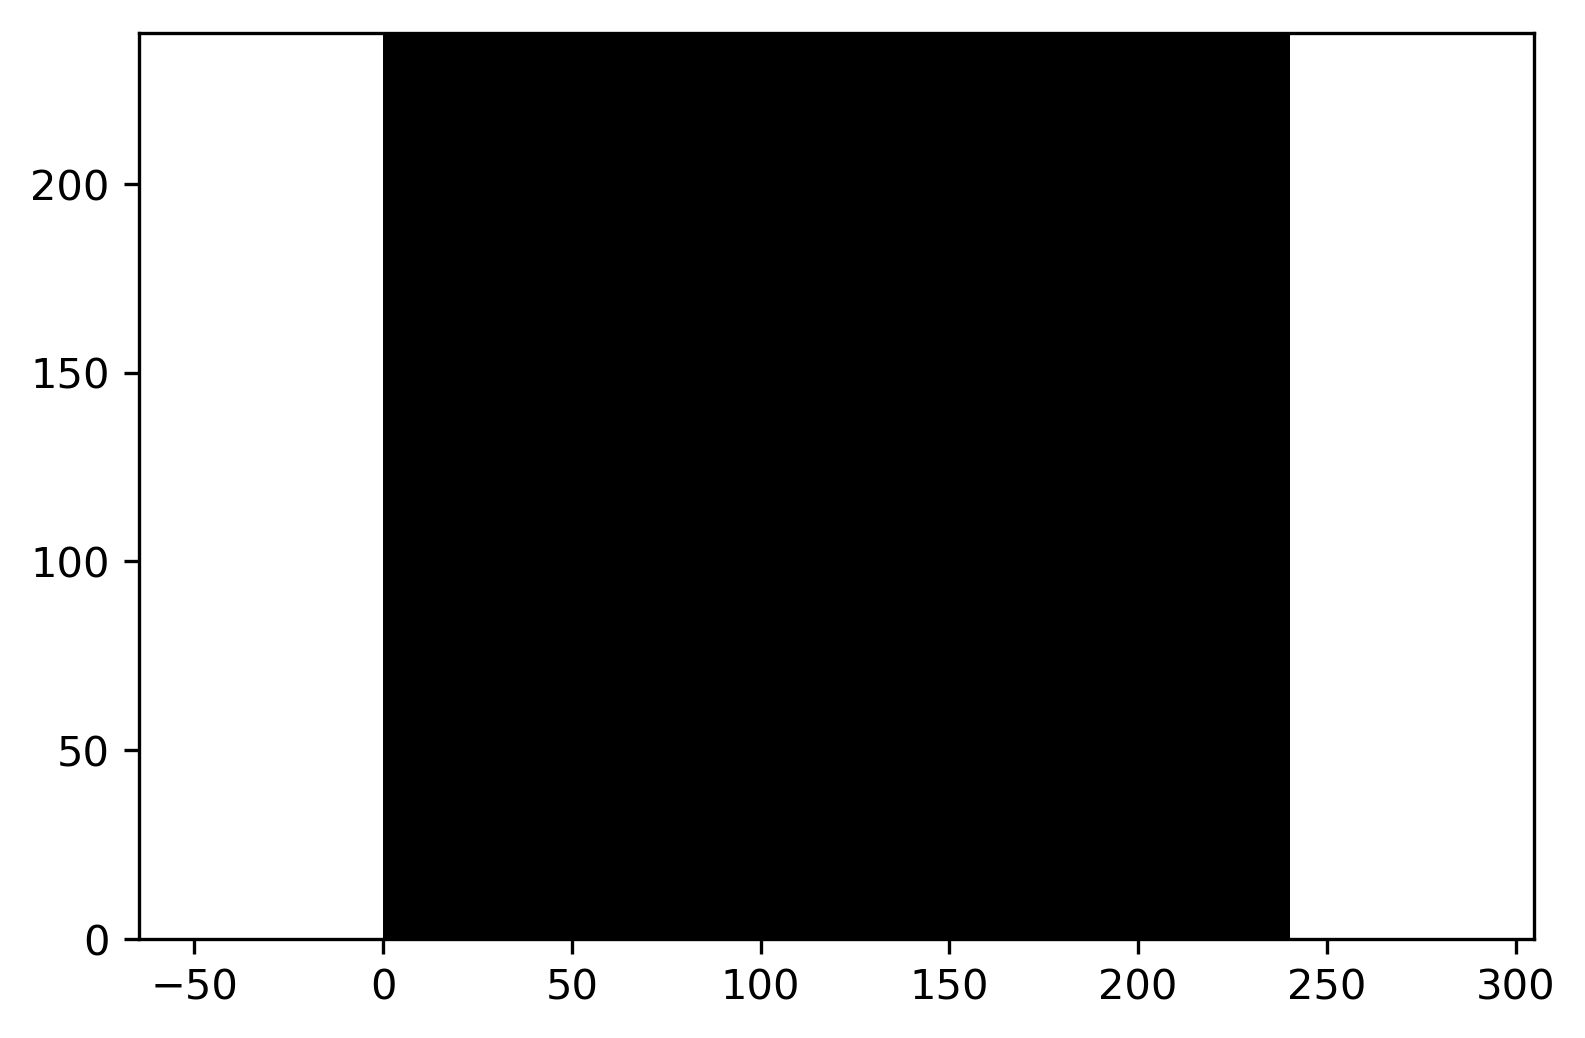

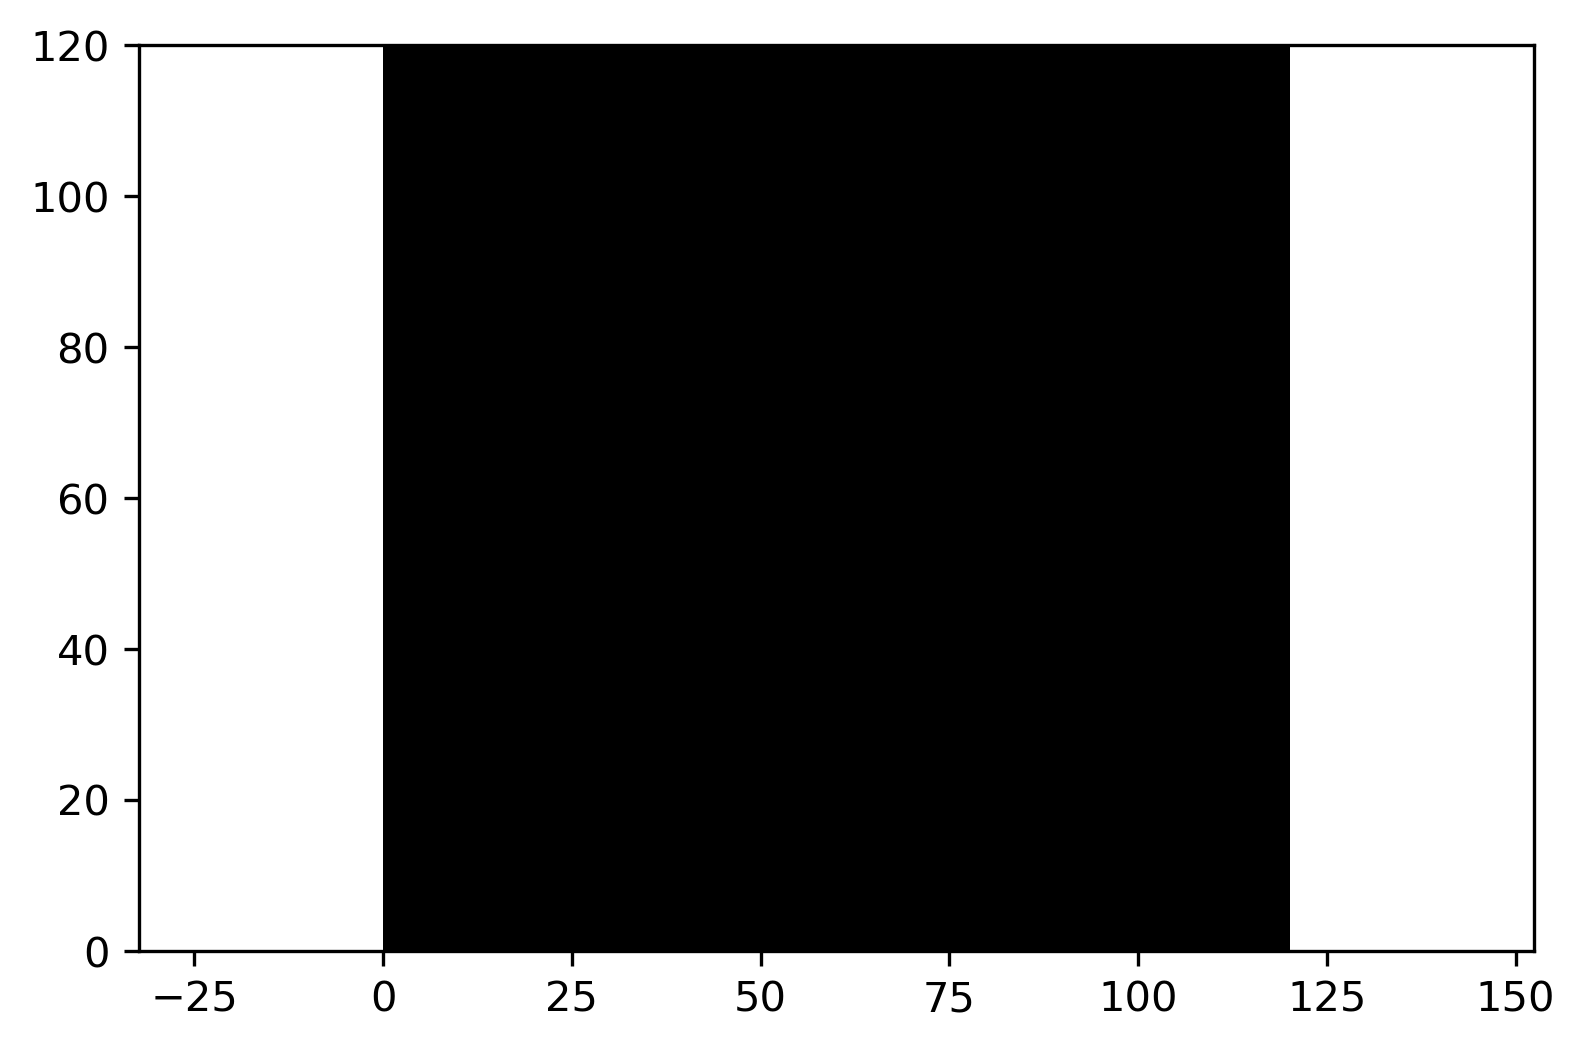

In [115]:
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, 80]))

pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x_ds, y_ds, numpy.flipud(ArrayDicom_ds[:, :, 80]))